# Music Analysis

In [1]:
import os

import time

import warnings
warnings.filterwarnings("ignore")      

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
PATH_DATA = '../../DL_DATA/MUSIC/data.csv'

In [3]:
df = pd.read_csv(PATH_DATA)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
df = df.drop("Unnamed: 0", axis="columns")

In [5]:
print(f'Size of dataset:{df.shape}')

Size of dataset:(2017, 16)


## Caracteristic Distributions

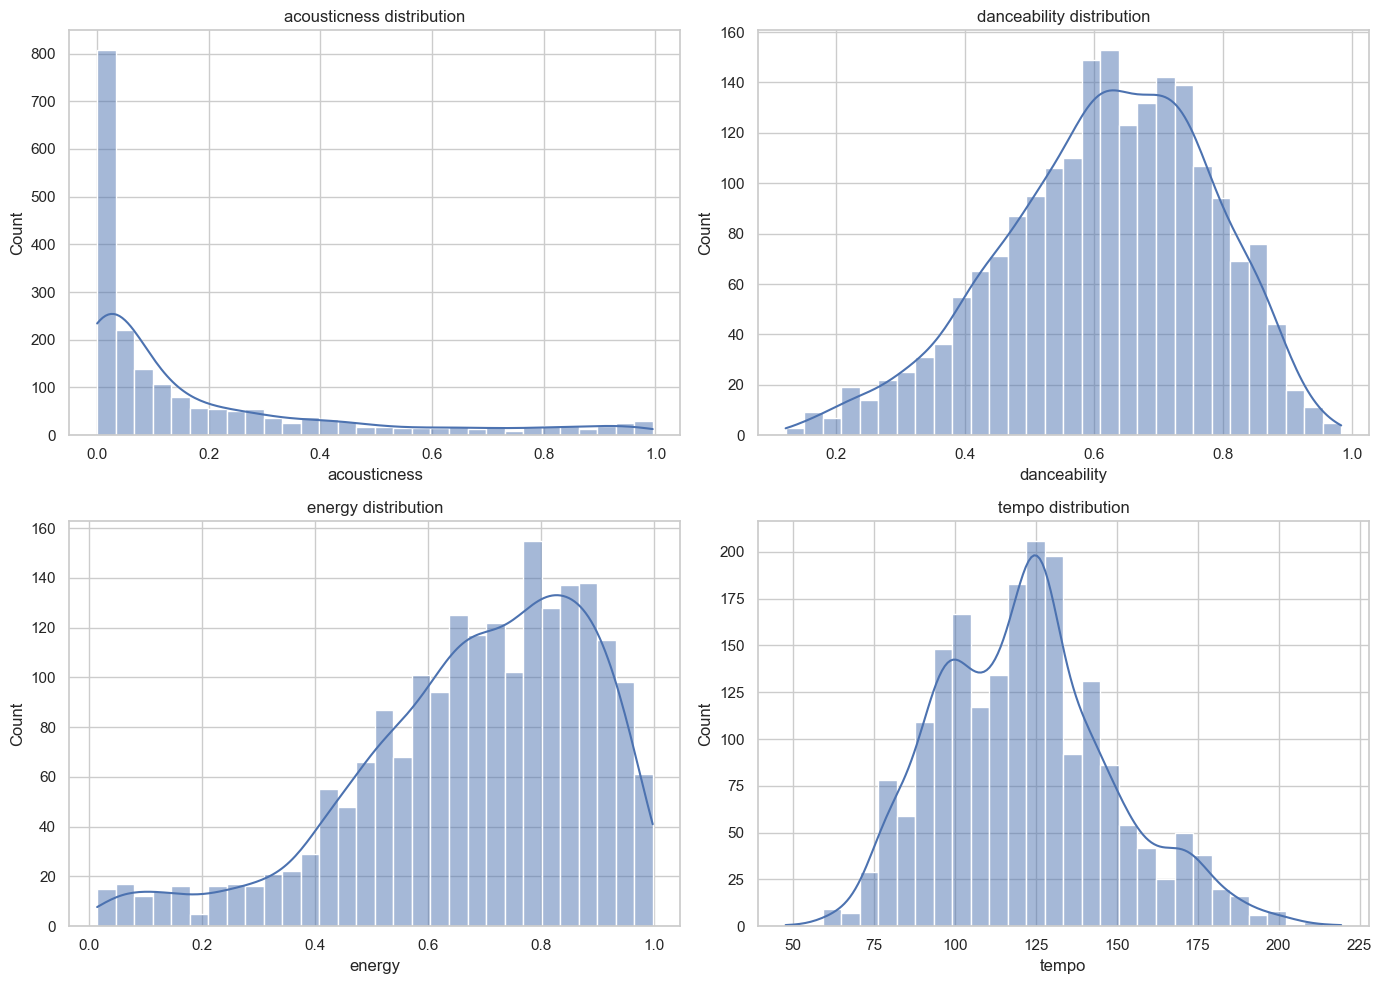

In [6]:
# Lista de características para visualizar
features_to_plot = ['acousticness', 'danceability', 'energy', 'tempo']

# Creando subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, feature in enumerate(features_to_plot):
    row = i // 2
    col = i % 2
    sns.histplot(df[feature], kde=True, ax=axes[row, col], bins=30)
    axes[row, col].set_title(f'{feature} distribution')

plt.tight_layout()
plt.show()

## Relationships between Characteristics

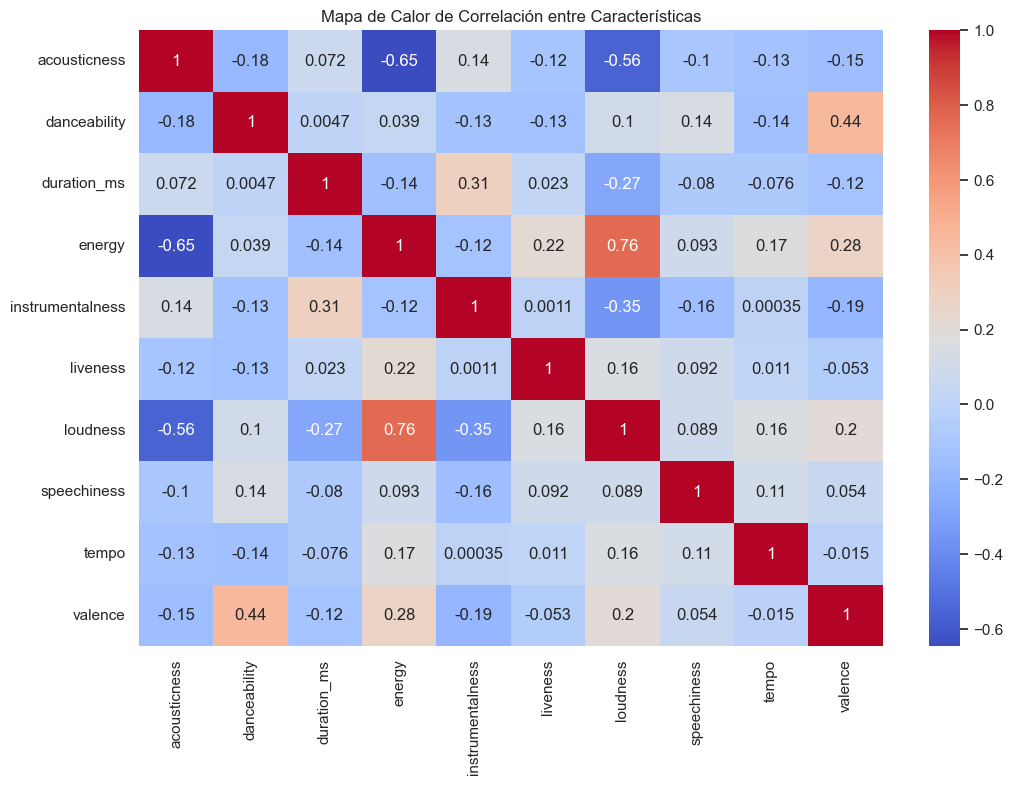

In [7]:
# Seleccionando las características numéricas para la correlación
correlation_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
                        'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                        'tempo', 'valence']

# Calculando la matriz de correlación
correlation_matrix = df[correlation_features].corr()

# Creando un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Características')
plt.show()


## Artists Analysis

In [8]:
artist_counts = df['artist'].value_counts().head(10)

artist_features = ['acousticness', 'danceability', 'energy', 'tempo', 'valence']

In [9]:
df['artist'].value_counts().head(10)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Crystal Castles     9
FIDLAR              9
Future              8
Fall Out Boy        8
Skrillex            8
Name: count, dtype: int64

In [10]:
type(artist_counts)

pandas.core.series.Series

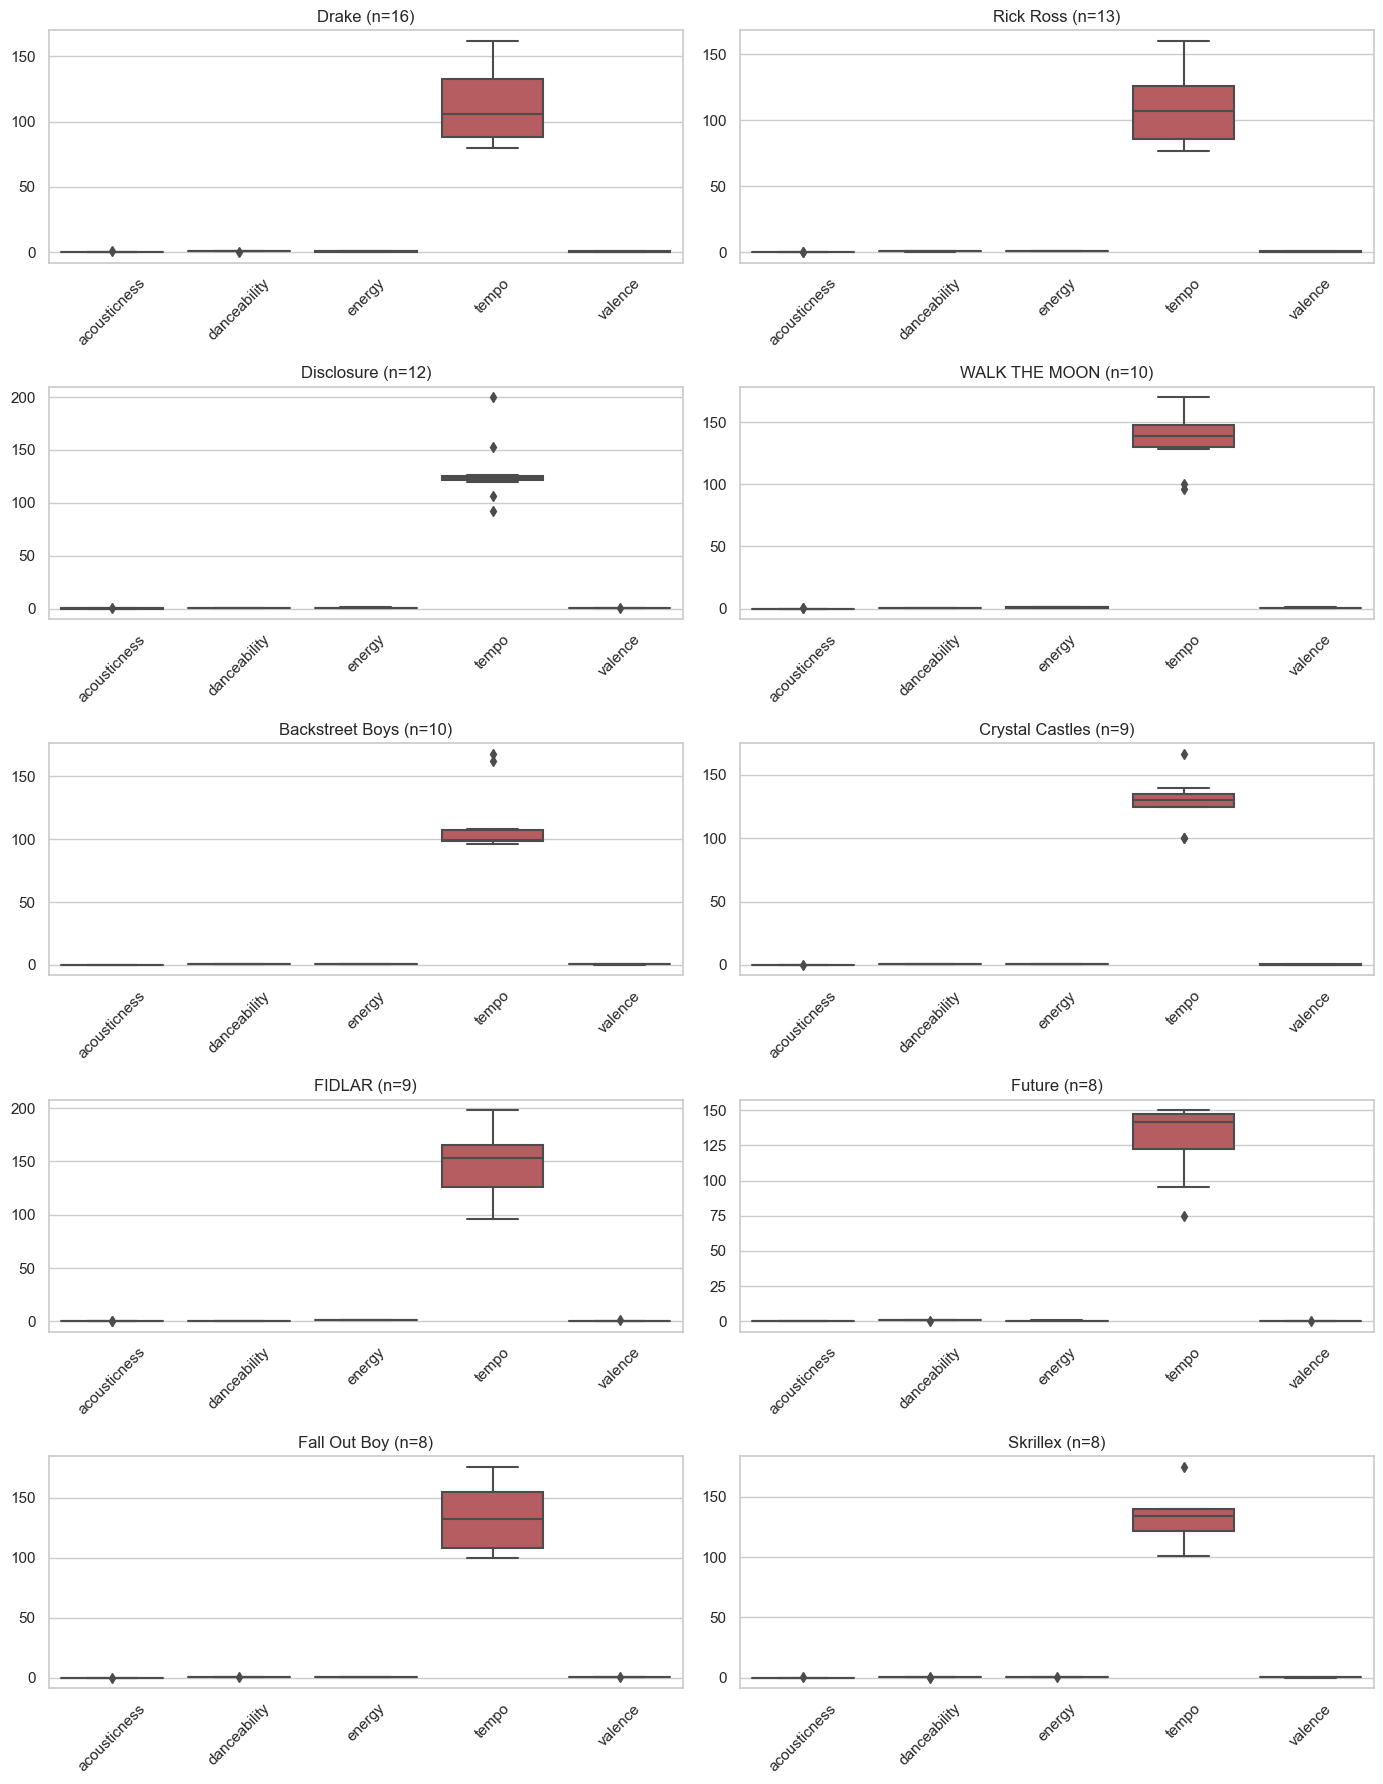

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))

for i, (artist, count) in enumerate(artist_counts.items()):
    row = i // 2
    col = i % 2
    artist_data = df[df['artist'] == artist][artist_features]
    sns.boxplot(data=artist_data, ax=axes[row, col])
    axes[row, col].set_title(f'{artist} (n={count})')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Song Recommender

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
def recommend_songs(song_title, n_recommendations=5):
    song_index = df[df['song_title'] == song_title].index[0]
    
    features_for_similarity = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                               'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
    
    similarity_matrix = cosine_similarity(df[features_for_similarity])
    
    similar_songs = list(enumerate(similarity_matrix[song_index]))
    similar_songs_sorted = sorted(similar_songs, key=lambda x: x[1], reverse=True)[1:n_recommendations+1]
    
    recommended_songs = [df.iloc[i[0]]['song_title'] for i in similar_songs_sorted]
    return recommended_songs

In [14]:
song_title_to_test = "Mask Off"
recommendations = recommend_songs(song_title_to_test)
recommendations

['Mask Off',
 "I Don't Sell Molly No More",
 'Mercy',
 'Females Welcomed (feat. Reija Lee)',
 'Dopeman']

In [15]:
song_title_to_test = "Dopeman"
recommendations = recommend_songs(song_title_to_test)
recommendations

['Bounce It',
 'Rhythm of Devotion',
 'Batuque (Jeremy Sole & Atropolis Remix)',
 'Females Welcomed (feat. Reija Lee)',
 'Hotline Bling']

## Classification of Songs Based on Characteristics (Supervised Learning)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# Características y etiquetas
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = df['target']

In [18]:
print(f'Num clases: {len(y.unique())}')

Num clases: 2


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1613, 9), (404, 9), (1613,), (404,))

In [20]:
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [21]:
X_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.000294,0.827,0.462,0.543000,0.0886,-10.673,0.0623,123.994,0.341
1,0.021900,0.630,0.684,0.001080,0.1030,-6.740,0.0399,142.952,0.881
2,0.063900,0.742,0.945,0.165000,0.1310,-6.445,0.0428,112.977,0.748
3,0.031000,0.510,0.747,0.000000,0.2330,-4.124,0.0651,125.951,0.349
4,0.014400,0.529,0.739,0.000255,0.3900,-5.356,0.0543,149.915,0.403


In [22]:
X_test.tail()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
399,0.07860,0.724,0.9040,0.000000,0.226,-3.354,0.0966,90.999,0.851
400,0.26800,0.651,0.7730,0.000000,0.172,-6.855,0.2620,129.882,0.418
401,0.00466,0.722,0.6140,0.000000,0.106,-7.549,0.1150,154.903,0.504
402,0.78300,0.418,0.0962,0.000066,0.136,-15.078,0.0559,184.721,0.342
403,0.00620,0.748,0.7330,0.000000,0.329,-4.421,0.0720,93.019,0.273


In [23]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_train)

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [26]:
print(f'Using {device} device.')

Using cuda device.


In [27]:
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [28]:
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64)

In [29]:
class SongClassifier(nn.Module):
    def __init__(self):
        super(SongClassifier, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(9, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(64, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.fc4 = nn.Sequential(
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.fc5 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = torch.sigmoid(self.fc5(x))
        return x


In [30]:
model = SongClassifier()
model.to(device)

SongClassifier(
  (fc1): Sequential(
    (0): Linear(in_features=9, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (fc2): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (fc3): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (fc4): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (fc5): Linear(in_features=16, out_features=1, bias=True)
)

In [31]:
from torchsummary import summary
summary(model, input_size=(9,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             640
       BatchNorm1d-2                   [-1, 64]             128
              ReLU-3                   [-1, 64]               0
           Dropout-4                   [-1, 64]               0
            Linear-5                   [-1, 64]           4,160
       BatchNorm1d-6                   [-1, 64]             128
              ReLU-7                   [-1, 64]               0
           Dropout-8                   [-1, 64]               0
            Linear-9                   [-1, 32]           2,080
      BatchNorm1d-10                   [-1, 32]              64
             ReLU-11                   [-1, 32]               0
          Dropout-12                   [-1, 32]               0
           Linear-13                   [-1, 16]             528
      BatchNorm1d-14                   

In [32]:
# from torchviz import make_dot
# x = torch.randn(2, 9) # Ajusta el tamaño según tu entrada
# y = model(x)

# dot = make_dot(y, params=dict(model.named_parameters()))

# dot.render("model_graph")
# dot.view()

In [33]:
learning_rate = 0.001
epochs = 10

In [34]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from tqdm import tqdm

In [36]:
X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

In [37]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

all_train_losses, all_val_losses, all_train_recalls, all_val_recalls = [], [], [], []
epochs = 10  # Definir el número de épocas según tus necesidades
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for train_index, val_index in kf.split(X_all_scaled):
    train_losses, val_losses, train_recalls, val_recalls = [], [], [], []
    X_train_fold, X_val_fold = X_all_scaled[train_index], X_all_scaled[val_index]
    y_train_fold, y_val_fold = y_all[train_index], y_all[val_index]

    X_train_fold_tensor = torch.tensor(X_train_fold, dtype=torch.float32)
    y_train_fold_tensor = torch.tensor(y_train_fold, dtype=torch.float32).view(-1, 1)
    X_val_fold_tensor = torch.tensor(X_val_fold, dtype=torch.float32)
    y_val_fold_tensor = torch.tensor(y_val_fold, dtype=torch.float32).view(-1, 1)

    train_dataset_fold = TensorDataset(X_train_fold_tensor, y_train_fold_tensor)
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)

    val_dataset_fold = TensorDataset(X_val_fold_tensor, y_val_fold_tensor)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32)

    model = SongClassifier().to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in tqdm(range(epochs), desc="Training Progress"):
        model.train()
        train_loss = 0
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader_fold:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            predicted = (y_pred > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader_fold))
        train_recalls.append(100 * correct / total)

        val_loss_epoch, all_preds, all_labels = 0, [], [] # Reiniciar all_preds y all_labels aquí
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                predicted = (y_pred > 0.5).float()
                all_preds.extend(predicted.cpu().numpy().flatten())
                all_labels.extend(y_batch.cpu().numpy().flatten())
                val_loss_epoch += loss.item()

        val_loss_epoch = val_loss_epoch / len(val_loader_fold)
        val_recall_epoch = recall_score(all_labels, all_preds, average='macro')
        val_losses.append(val_loss_epoch)
        val_recalls.append(val_recall_epoch)
    
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_recalls.append(train_recalls)
    all_val_recalls.append(val_recalls)

    print(f'Validation Loss: {val_loss_epoch}, Validation Recall: {val_recall_epoch}')

Training Progress: 100%|██████████| 10/10 [00:02<00:00,  4.71it/s]


Validation Loss: 0.5660533538231483, Validation Recall: 0.7098445595854922


Training Progress: 100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


Validation Loss: 0.594139461333935, Validation Recall: 0.6233183856502242


Training Progress: 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]


Validation Loss: 0.5589293035177084, Validation Recall: 0.6473684210526316


Training Progress: 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]


Validation Loss: 0.5849249408795283, Validation Recall: 0.5806451612903226


Training Progress: 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]

Validation Loss: 0.5803017226549295, Validation Recall: 0.5939086294416244


In [38]:
avg_train_losses = np.mean(all_train_losses, axis=0)
avg_val_losses = np.mean(all_val_losses, axis=0)
avg_train_recalls = np.mean(all_train_recalls, axis=0)
avg_val_recalls = np.mean(all_val_recalls, axis=0)

In [39]:
avg_train_losses.shape, avg_val_losses.shape, avg_train_recalls.shape, avg_val_recalls.shape

((10,), (10,), (10,), (10,))

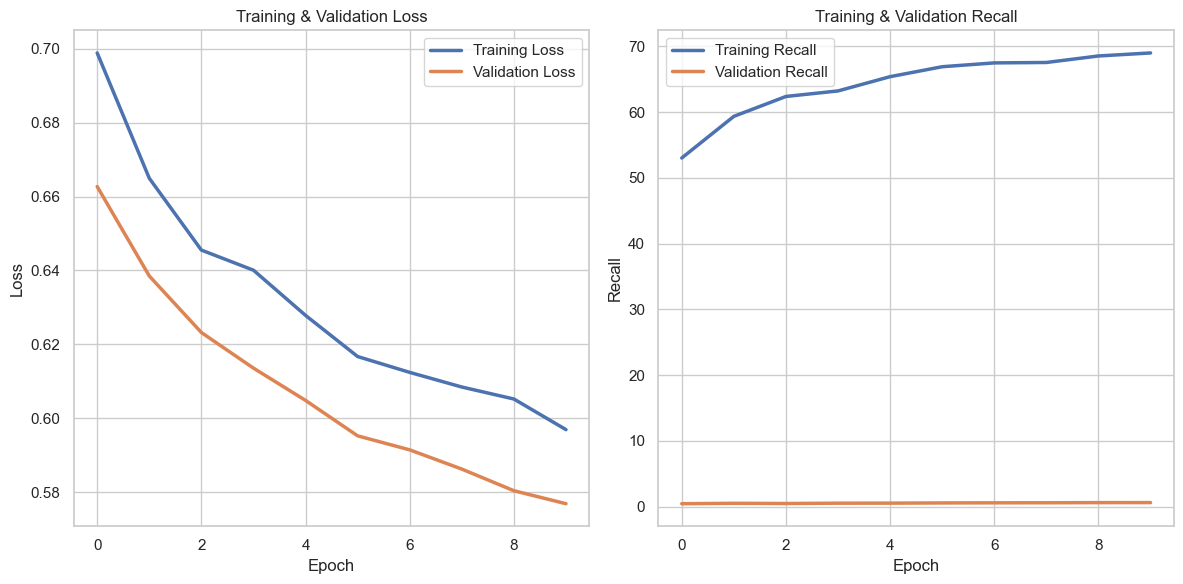

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(epochs), y=avg_train_losses, label="Training Loss", linewidth=2.5)
sns.lineplot(x=range(epochs), y=avg_val_losses, label="Validation Loss", linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=range(epochs), y=avg_train_recalls, label="Training Recall", linewidth=2.5)
sns.lineplot(x=range(epochs), y=avg_val_recalls, label="Validation Recall", linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training & Validation Recall')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
model.eval()
val_loss = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in val_loader_fold:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        predicted = (y_pred > 0.5).float()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
        val_loss += loss.item()

val_recall = recall_score(all_labels, all_preds, average='macro')

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_labels, all_preds)

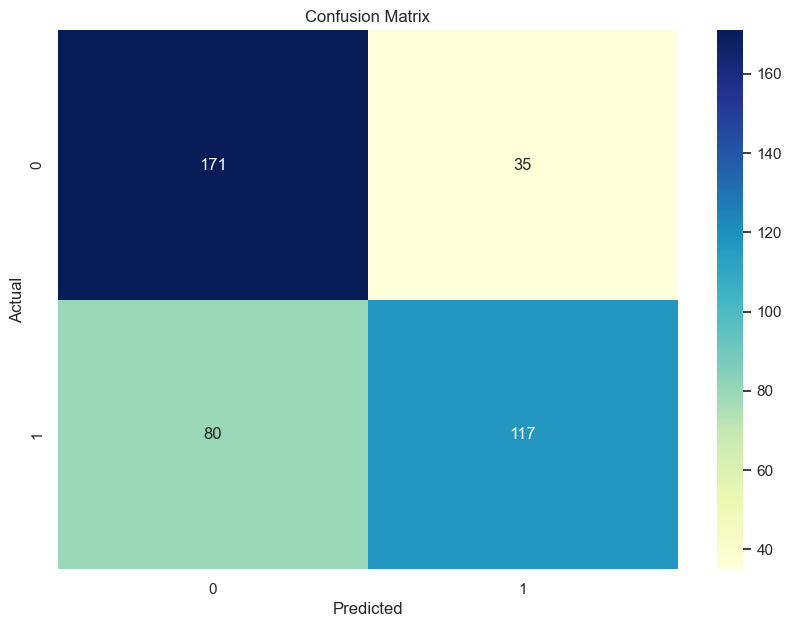

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
print(f'recall score = {val_recall}')

recall score = 0.5939086294416244
